In [3]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from citipy import citipy
import gmaps
import os
from scipy.stats import linregress
import scipy.stats as st

# Census API Key
from config import (census_api_key, g_key)
c = Census(census_api_key, year=2014)

In [4]:
# Read in population transit csv file
city_transit = pd.read_csv("Resources/city_pop_transit_age_latlng.csv")
city_transit.head()

,City,Population,Public Transportation Rate,Median Age,Lat,Lng
0,ABAC,25590.0,0.346470,36.90,31.483076,-83.530194
1,Aberdeen,31027.0,0.362211,36.70,57.149717,-2.094278
2,Aberdeen Township,30709.0,11.924538,41.70,40.417095,-74.222116
3,Abilene,57336.0,0.802012,31.45,32.448736,-99.733144
4,Abingdon,29587.0,1.981002,35.60,36.709833,-81.977348


The r-value is: 0.21


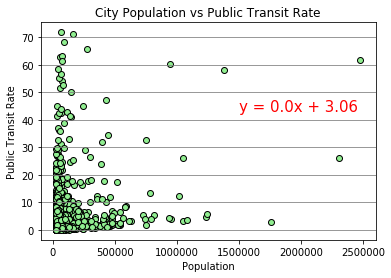

In [5]:
# Create a scatter plot for population vs public transit rate
x = city_transit["Population"]
y = city_transit["Public Transportation Rate"]

# Find r-value
correlation = st.pearsonr(x,y)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y,edgecolors="black",facecolors="lightgreen")
plt.annotate(line_eq,(1500000,43),fontsize=15,color="red")
plt.title("City Population vs Public Transit Rate")
plt.xlabel("Population")
plt.ylabel("Public Transit Rate")
plt.grid(b=True,which="major",axis="y",linestyle="-",color="grey")
plt.show()

The r-value is: -0.06


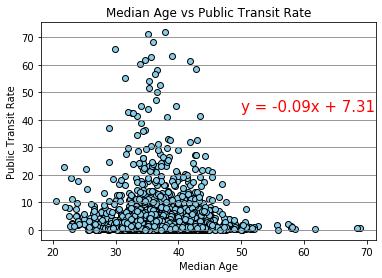

In [6]:
# Create a scatter plot for population vs public transit rate
x = city_transit["Median Age"]
y = city_transit["Public Transportation Rate"]

# Find r-value
correlation = st.pearsonr(x,y)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y,edgecolors="black",facecolors="skyblue")
plt.annotate(line_eq,(50,43),fontsize=15,color="red")
plt.title("Median Age vs Public Transit Rate")
plt.xlabel("Median Age")
plt.ylabel("Public Transit Rate")
plt.grid(b=True,which="major",axis="y",linestyle="-",color="grey")
plt.show()

In [7]:
# Total population
total_population = city_transit["Population"].sum()

# Create bins
bins = [0,20,29,39,49,59,70]

# Create group names
group_names = ["<20","20-29","30-39","40-49","50-59","60+"]

# Calculate count and percentages by age group
age_group = city_transit[["City","Median Age"]].copy()
age_group["Age Group"] = pd.cut(age_group["Median Age"],bins,labels = group_names,include_lowest=True)
age_group_df = age_group.groupby("Age Group")
city = age_group_df["City"].nunique()

# Create new data frame
age_df = pd.DataFrame({"Total Count of Median Age":city})
age_df.index.name="Age Ranges"
age_df

,Total Count of Median Age
Age Ranges,
<20,0
20-29,108
30-39,1366
40-49,756
50-59,33
60+,3


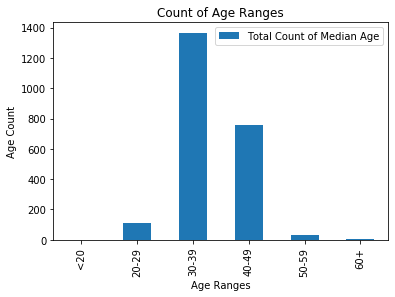

In [8]:
# Plotting age groups to a bar chart
age_df.plot.bar()
plt.ylabel("Age Count")
plt.title("Count of Age Ranges")
plt.show()

In [9]:
# Drop any NA values
clean_city_transit = city_transit.dropna(how="any")

# Configure gmaps
gmaps.configure(api_key=g_key)

# Store Lat and Lng into Locations
locations = clean_city_transit[["Lat","Lng"]].astype(float)
transit_rate = clean_city_transit["Public Transportation Rate"].astype(float)

# Create a humidity heatmap
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=transit_rate,dissipating=False,max_intensity=100,point_radius=1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
# Read in pollution csv file
pollution_data = pd.read_csv("Resources/Collected_Pollution_Measurements.csv")
pollution_data.head()

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.84046,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.84046,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.84046,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.84046,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.84046,34.694286,2480847.0


In [14]:
top_transit_rate = clean_city_transit.sort_values("Public Transportation Rate",ascending=False)
top_transit_rate.head(20)

,City,Population,Public Transportation Rate,Median Age,Lat,Lng
912,Jackson Heights,63202.0,71.771714,37.900000,40.755682,-73.883070
1105,Long Island City,163789.0,71.090482,35.220000,40.744679,-73.948542
2236,Woodside,88939.0,68.267635,35.900000,39.043416,-94.610257
2155,West Bronx,277955.0,65.549832,29.875000,40.851955,-73.900709
523,East Flatbush,77011.0,63.130525,38.900000,40.648166,-73.929990
218,Briarwood,54523.0,62.715252,35.700000,36.312483,-94.114123
231,Brooklyn,2480847.0,61.840460,34.694286,40.678178,-73.944158
651,Forest Hills,69652.0,61.260193,41.900000,40.718106,-73.844847
1991,The Bronx,941062.0,60.225610,33.846667,40.844782,-73.864827
1670,Rego Park,41792.0,58.448699,42.800000,40.725572,-73.862489


In [27]:
jackson_heights = pollution_data.loc[(pollution_data["City"] == "Jackson Heights")] 
jackson_heights.head()

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
64821,2021-01-31 12:00:00,307.08,0.10,27.76,43.63,6.56,4.60,8.07,1.85,1.0,Jackson Heights,71.771714,37.9,63202.0
64822,2021-01-31 11:00:00,273.71,0.02,19.02,54.36,5.78,2.83,5.04,1.22,1.0,Jackson Heights,71.771714,37.9,63202.0
64823,2021-01-31 10:00:00,267.03,0.01,16.97,57.94,5.31,2.51,4.51,1.08,1.0,Jackson Heights,71.771714,37.9,63202.0
64824,2021-01-31 09:00:00,270.37,0.01,17.31,57.22,5.13,2.67,4.82,1.12,1.0,Jackson Heights,71.771714,37.9,63202.0
64825,2021-01-31 08:00:00,277.04,0.01,18.17,55.79,4.89,3.05,5.41,1.22,1.0,Jackson Heights,71.771714,37.9,63202.0


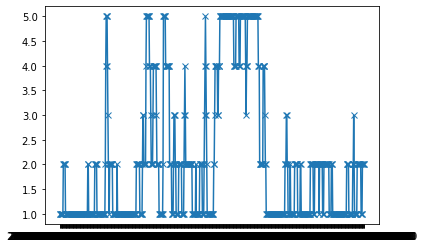

In [28]:
# line graph for aqi of Jackson Heights over time
plt.plot(jackson_heights["datetime"],jackson_heights["aqi"],marker="x")
plt.show()

In [33]:
new_years = pollution_data.loc[pollution_data["datetime"] == "2021-01-01 12:00:00"]
new_years

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
696,2021-01-01 12:00:00,814.44,54.54,70.60,0.00,20.98,34.67,45.12,9.88,4.0,Brooklyn,61.840460,34.694286,2480847.0
1393,2021-01-01 12:00:00,257.02,0.00,8.48,71.53,3.61,3.90,5.01,0.87,1.0,Chicago,26.096482,34.290000,2309901.0
2090,2021-01-01 12:00:00,240.33,0.00,7.88,67.95,1.73,1.08,1.56,0.81,1.0,Houston,2.762716,32.227907,1758164.0
2787,2021-01-01 12:00:00,206.95,0.00,2.59,80.11,0.68,1.38,7.60,0.84,2.0,Las Vegas,4.647077,36.455172,1235945.0
3484,2021-01-01 12:00:00,600.82,32.63,49.35,0.01,3.76,20.12,31.79,3.61,3.0,Los Angeles,12.176151,32.657143,1019978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199341,2021-01-01 12:00:00,287.06,0.00,8.14,44.35,1.36,3.80,5.32,0.63,1.0,Lawrenceville,0.979575,34.475000,236710.0
200038,2021-01-01 12:00:00,213.62,0.01,3.98,26.11,0.47,2.20,2.47,0.14,1.0,Suwanee,0.980790,36.900000,70891.0
200735,2021-01-01 12:00:00,370.50,0.24,31.19,25.03,7.09,8.15,10.62,2.44,1.0,Del Sur,0.981277,35.800000,71313.0
201432,2021-01-01 12:00:00,247.00,0.00,4.88,67.95,3.04,2.11,2.20,0.25,1.0,Overland Park,0.995605,37.350000,62517.0


In [38]:
first_monday = pollution_data.loc[pollution_data["datetime"] == "2021-01-04 08:00:00"]
first_monday

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
628,2021-01-04 08:00:00,390.53,0.74,50.72,14.84,10.73,8.24,10.27,1.31,2.0,Brooklyn,61.840460,34.694286,2480847.0
1325,2021-01-04 08:00:00,303.75,0.01,24.33,50.07,21.70,15.93,18.59,0.58,2.0,Chicago,26.096482,34.290000,2309901.0
2022,2021-01-04 08:00:00,233.65,0.00,10.63,60.08,1.83,3.13,4.57,0.34,1.0,Houston,2.762716,32.227907,1758164.0
2719,2021-01-04 08:00:00,894.55,55.88,81.57,0.00,11.09,58.21,81.38,9.88,5.0,Las Vegas,4.647077,36.455172,1235945.0
3416,2021-01-04 08:00:00,2403.26,227.09,175.48,0.00,12.52,204.68,246.43,22.04,5.0,Los Angeles,12.176151,32.657143,1019978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199273,2021-01-04 08:00:00,283.72,0.00,8.14,49.35,0.36,2.86,3.11,0.04,1.0,Lawrenceville,0.979575,34.475000,236710.0
199970,2021-01-04 08:00:00,243.66,0.00,4.20,60.80,0.48,1.75,2.87,0.37,1.0,Suwanee,0.980790,36.900000,70891.0
200667,2021-01-04 08:00:00,350.48,0.24,21.94,15.20,2.83,5.67,6.29,0.18,1.0,Del Sur,0.981277,35.800000,71313.0
201364,2021-01-04 08:00:00,287.06,0.02,12.51,37.91,1.37,12.49,13.60,1.87,2.0,Overland Park,0.995605,37.350000,62517.0


In [40]:
# merge new years with city transit dataframe
new_years_map = pd.merge(city_transit,new_years, on="City")
new_years_map.head()

,City,Population_x,Public Transportation Rate_x,Median Age_x,Lat,Lng,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Public Transportation Rate_y,Median Age_y,Population_y
0,Abilene,57336.0,0.802012,31.450000,32.448736,-99.733144,2021-01-01 12:00:00,196.93,0.00,0.61,91.55,0.18,0.50,0.51,0.22,2.0,0.802012,31.450000,57336.0
1,Aguadilla Pueblo,53162.0,0.837139,39.200000,18.427445,-67.154070,2021-01-01 12:00:00,183.58,0.00,0.20,76.53,0.28,3.03,11.17,0.48,1.0,0.837139,39.200000,53162.0
2,Alpharetta,163810.0,0.966486,36.966667,34.075376,-84.294090,2021-01-01 12:00:00,220.30,0.03,5.48,25.39,0.88,2.21,2.50,0.15,1.0,0.966486,36.966667,163810.0
3,Altoona,63235.0,0.594901,40.250000,40.518681,-78.394736,2021-01-01 12:00:00,267.03,0.00,5.31,50.78,1.54,3.95,4.52,0.52,1.0,0.594901,40.250000,63235.0
4,Ames,58891.0,8.730485,26.500000,42.030781,-93.631913,2021-01-01 12:00:00,297.07,0.00,9.43,50.78,3.82,10.53,10.85,3.42,2.0,8.730485,26.500000,58891.0


In [41]:
# Drop any NA values
clean_new_years = new_years_map.dropna(how="any")

# Configure gmaps
gmaps.configure(api_key=g_key)

# Store Lat and Lng into Locations
locations = clean_new_years[["Lat","Lng"]].astype(float)
aqi = clean_new_years["aqi"].astype(float)

# Create a aqi heatmap
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=aqi,dissipating=False,max_intensity=5,point_radius=1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# merge first monday with city transit dataframe
first_monday_map = pd.merge(city_transit,first_monday, on="City")
first_monday_map.head()

,City,Population_x,Public Transportation Rate_x,Median Age_x,Lat,Lng,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Public Transportation Rate_y,Median Age_y,Population_y
0,Abilene,57336.0,0.802012,31.450000,32.448736,-99.733144,2021-01-04 08:00:00,216.96,0.00,1.67,72.96,0.14,7.02,24.83,1.28,2.0,0.802012,31.450000,57336.0
1,Aguadilla Pueblo,53162.0,0.837139,39.200000,18.427445,-67.154070,2021-01-04 08:00:00,173.57,0.00,0.28,75.82,0.19,3.08,11.95,0.55,1.0,0.837139,39.200000,53162.0
2,Alpharetta,163810.0,0.966486,36.966667,34.075376,-84.294090,2021-01-04 08:00:00,250.34,0.00,6.08,56.51,0.61,2.19,3.55,0.31,1.0,0.966486,36.966667,163810.0
3,Altoona,63235.0,0.594901,40.250000,40.518681,-78.394736,2021-01-04 08:00:00,317.10,0.01,14.40,16.09,1.37,2.10,2.25,0.06,1.0,0.594901,40.250000,63235.0
4,Ames,58891.0,8.730485,26.500000,42.030781,-93.631913,2021-01-04 08:00:00,317.10,0.00,9.00,55.79,2.38,27.08,27.77,1.01,4.0,8.730485,26.500000,58891.0


In [43]:
# Drop any NA values
clean_first_monday = first_monday_map.dropna(how="any")

# Configure gmaps
gmaps.configure(api_key=g_key)

# Store Lat and Lng into Locations
locations = clean_first_monday[["Lat","Lng"]].astype(float)
aqi = clean_first_monday["aqi"].astype(float)

# Create a aqi heatmap
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=aqi,dissipating=False,max_intensity=5,point_radius=1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))